***Titanic Disaster Survival***

**Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Load Data using Pandas**

In [2]:
# Import Train CSV file as Titanic Data Frame
titanic_data = pd.read_csv('../input/titanic/train.csv')
print("Import Complete")

Import Complete


**Data Exploration using Pandas**

In [3]:
# Head (first 5 Rows) of Titanic Data Frame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Shape of Titanic Data Frame (Rows, Columns)
titanic_data.shape

(891, 12)

In [5]:
# Column Names for Titanic Data Frame
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Info for Titanic Data Frame
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Data Types for Titanic Data Frame
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Describe Titanic Data Frame
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Analysis Using Seaborn**

<AxesSubplot:xlabel='Survived', ylabel='count'>

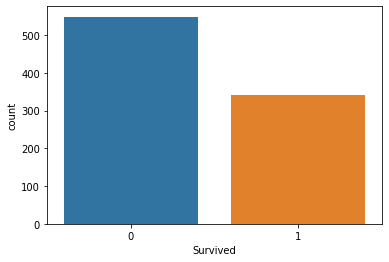

In [9]:
# Countplot comparing Survived vs Not Survived in Titanic Data Frame
sns.countplot(x='Survived', data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

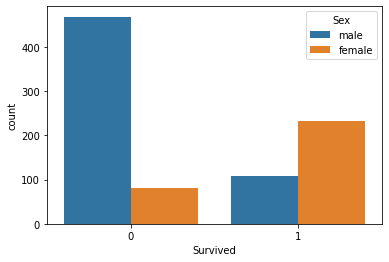

In [10]:
# Countplot comparing Male vs Female Survival in Titanic Data Frame
sns.countplot(x='Survived', data = titanic_data, hue = 'Sex')

Null Values

In [11]:
# Check for Null values in Titanic Data Frame
titanic_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Check for Total Null values in Titanic Data Frame
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

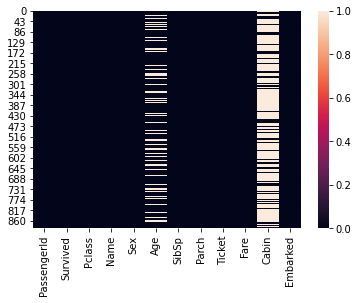

In [13]:
# Seaborn Heatmap Plot of Null values in Titanic Data Frame
sns.heatmap(titanic_data.isna())

In [14]:
# Check Percentage of Null values in 'Age' Column of Titanic Data Frame
# Will we Delete Null values or Impute Null Values?
# Sum of NA values in 'Age' column, divided by Length of 'Age' column (multiplied by 100 for percentage) in Titanic Data Frame
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

19.865319865319865

Because Null values are 20%, we will Impute the Null values

In [15]:
# Check Percentage of Null values in 'Cabin' Column of Titanic Data Frame
# Will we Delete Null values or Impute Null Values?
# Sum of NA values in 'Cabin' column, divided by Length of 'Cabin' column (multiplied by 100 for percentage) in Titanic Data Frame
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

Because Null values are 77%, we will Discard Null values/Column

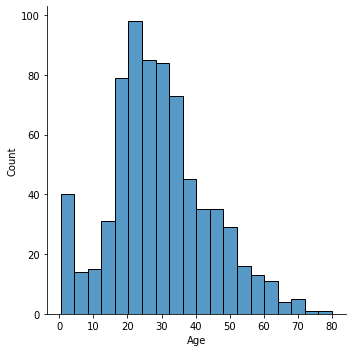

In [16]:
# Seaborn Distribution Plot of 'Age' values in Titanic Data Frame
sns.displot(x = 'Age', data = titanic_data)

Majority of passengers were between 15-40

**Data Cleaning**

Imputing Data for Null/NA Values

In [17]:
# Impute Null values in 'Age' column of Titanic Data Frame
# Find Mean value of 'Age' column
titanic_data['Age'].mean()
# Use Mean value of 'Age' column to fill IN PLACE where 'Age' is NA
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)

In [18]:
# Verify Null Values in 'Age' column of Titanic Data Frame
titanic_data['Age'].isna().sum()


0

<AxesSubplot:>

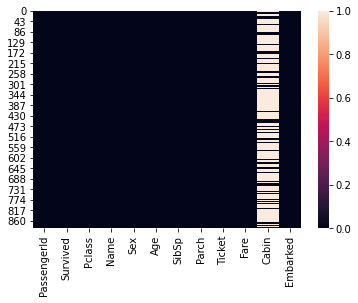

In [19]:
# Seaborn Heatmap Plot of Null values in Titanic Data Frame
# Visualize Null values Filled with Mean values 
sns.heatmap(titanic_data.isna())

Removing Data for Null/NA Values

In [20]:
# Drop Null values in 'Cabin' column of Titanic Data Frame
# Drop 'Cabin' IN PLACE where NA 
# Axis = 0 for Rows, Axis = 1 for Columns
titanic_data.drop('Cabin', axis = 1, inplace = True)

<AxesSubplot:>

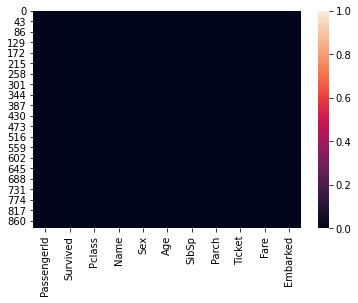

In [21]:
## Seaborn Heatmap Plot of Null values in Titanic Data Frame
# Visualize Null values Filled with Mean values 
sns.heatmap(titanic_data.isna())

Cabin column has been removed.  No more Null/NA values in Titanic Data Frame

**Preparing Data for Model**

Requires Converting ALL Non-Numerical columns to Numeric values

In [22]:
# Check columns for Non-Numeric Data Types for Titanic Data Frame
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [23]:
# Check columns for Non-Numeric Data Types for Titanic Data Frame
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Name is non-numerical, Sex is non-numerical, Ticket is non-numerical, and Embarked is non-numerical

In [24]:
# Convert 'Sex' column in Titanic Data Frame into Numeric Values
# Use Pandas to Convert String into Dummy Data
pd.get_dummies(titanic_data['Sex'])


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


Adds two dummy columns, Female and Male.  0 = False, 1 = True for those specific column values.

In [25]:
# Assigns new variable Gender
# Removes Female dummy column
# Assigns Gender to 0 = Female (not Male) or 1 = Male
gender = pd.get_dummies(titanic_data['Sex'], drop_first = True)


In [26]:
# Adds new column 'Gender' to Titanic Data Frame
titanic_data['Gender'] = gender

In [27]:
# Verify Gender column added to Titanic Data Frame
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [28]:
# Show Head (first 5 Rows) of NEW Titanic Data Frame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


Dropping Columns Identified as Not Required

In [29]:
# Drop Non-Numerical Columns from the Titanic Data Frame
titanic_data.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [30]:
# Verify Non-Numeric Columns were Removed from Titanic Data Frame
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


Separate Dependent and Independent Variables

In [31]:
# Setting Dependent Variables
# List of Lists - these are the numeric parameters for possible survival
# Setting Independent Variable to 'Survived' Column - that is the question we are asking
dependent_var = titanic_data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
independent_var = titanic_data['Survived']

In [32]:
# Verify dependent_var
dependent_var

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


In [33]:
# Verify independent_var
independent_var

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Data Import, Analysis, Wrangling, Cleaning - COMPLETE

**Data Modeling**

Building Model using Logistic Regression

In [34]:
# Import Train Test Split Method
# Uses SciKit Learn
from sklearn.model_selection import train_test_split
print('Train Test Import Complete')

Train Test Import Complete


In [35]:
# Train Test Split
# Use Shift+Tab to open Help
# See Examples section
# Copy and Paste from Example then Remove ... split so all on same line
# Change depenent_var and independent_var based on variables assigned Line 35
dependent_var_train, dependent_var_test, independent_var_train, independent_var_test = train_test_split(dependent_var, independent_var, test_size = 0.33, random_state = 42)
print('Training Complete')

Training Complete


In [36]:
# Import Logistic Regression

from sklearn.linear_model import LogisticRegression
print('Logistic Regression Import Complete')

Logistic Regression Import Complete


In [37]:
# Fit Logistic Regression
# Assign Variable 'lr' to Logistic Regression
# Use _train Variables from Train Test Split - Line 42
# Can Ignore Error Msg for Number of Iterations
lr = LogisticRegression()
lr.fit(dependent_var_train, independent_var_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [38]:
# Predict based on Logistic Regression
# Use _test Dependent Variable from Train Test Split - Line 42
predict = lr.predict(dependent_var_test)

Data Modeling - COMPLETE

**Test Model Performance**

In [39]:
# Print Confusion Matrix using SciKit Learn
from sklearn.metrics import confusion_matrix
print('Confusion Matrix Import Complete')

Confusion Matrix Import Complete


In [40]:
# Creates new Pandas Data Frame for Confusion Matrix results
# Uses independent_test Variable from Train Test Split and predict Variable from Logistic Regression
# Prediction vs Actual
pd.DataFrame(confusion_matrix(independent_var_test, predict), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,152,23
Actual Yes,37,83
